# Machine Learning: Grafos

#### Autores: Álvaro de Prada Martínez, Ignacio Gámez, Federico Ros, Jorge Fuertes

# Introducción


Los grafos son una estructura más general que los árboles de decisión; de hecho, se puede pensar en un árbol como un tipo especial de grafo. Los grafos se pueden usar para representar muchas cosas interesantes sobre nuestro mundo, incluyendo sistemas de carreteras, vuelos de avión de una ciudad a otra, cómo está conectado Internet, o incluso la secuencia de clases que deben tomarse para completar una especialidad en ciencias de la computación. Veremos que una vez que tengamos una buena representación para un problema, podemos usar algunos algoritmos estándar de grafos para resolver lo que de otra manera podría parecer un problema muy difícil.

### Definición

La teoría de grafos es un campo de las matemáticas y de las ciencias 
de la computación, que estudia las propiedades de las gráficas estructuras que constan de dos partes el conjunto
de vértices, nodos o puntos; y el conjunto de aristas, lineas o lados. 
Entre las aplicaciones o importancia de los grafos esta el poder ordenar de una forma eficaz mediante algoritmos
el trayecto del camino mas corto entre un punto y otro pasando por uno cuantos o muchos otros vértices(puntos).

La teoría de grafos tiene sus fundamentos en las matemáticas discretas y de las matemáticas aplicadas. Esta teoría que requiere de diferentes conceptos de diversas áreas como combinatoria, álgebra, probabilidad, geometría de polígonos, aritmética y topología. Actualmente ha tenido mayor influencia en el campo de la informática, las ciencias de la computación y telecomunicaciones. Debido a la gran cantidad de aplicaciones en la optimización de recorridos, procesos, flujos, algoritmos de búsquedas, entre otros, se generó toda una nueva teoría que se conoce como análisis de redes. Formalmente, un grafo G = ( V , E ) es una pareja ordenada en la que V es un conjunto no vacío de vértices y E es un conjunto de aristas. Donde V consta de pares no ordenados de vértices, tales como {x , y} ∈ E entonces decimos que x e y son adyacentes; y [en el grafo] se representa mediante una línea no orientada que una dichos vértices. Si el grafo es dirigido se le llama digrafo, se denota D, y entonces el par ( x , y ) es un par ordenado, y se representa con una flecha que va de x a y, y decimos que ( x , y ) ∈ E.

## Partes de un grafo


- Vértice:
    Un vértice (también llamado “nodo”) puede tener información adicional. A esta información adicional la llamaremos “carga útil”.  V={V0,V1,V2,V3,V4,V5}
    
- Arista:
    Una arista (también llamada “arco”) conecta dos vértices para mostrar que hay una relación entre ellos. Las aristas pueden ser unidireccionales o bidireccionales. Si las aristas de un grafo son todas unidireccionales, decimos que el grafo es un grafo dirigido o un digrafo. 
    E={(v0,v1,5),(v1,v2,4),(v2,v3,9),(v3,v4,7),(v4,v0,1),(v0,v5,2),(v5,v4,8),(v3,v5,3),(v5,v2,1)}
    
- Ponderación:
    Las aristas pueden ponderarse para mostrar que hay un costo para ir de un vértice a otro. Por ejemplo, en un grafo de carreteras que conectan una ciudad con otra, la ponderación en la arista puede representar la distancia entre las dos ciudades. 
    
- Ruta:
    Una ruta en un grafo es una secuencia de vértices que están conectados por las aristas. Formalmente definiríamos una ruta como w1,w2,...,wn tal que (wi,wi+1)∈E para todo 1≤i≤n−1. La longitud de la ruta no ponderada es el número de aristas en la ruta, específicamente n−1. La longitud ponderada de la ruta es la suma de las ponderaciones de todos las aristas en la trayectoria.
    
- Ciclo:
    Un ciclo en un grafo dirigido es una ruta que comienza y termina en el mismo vértice. Un grafo sin ciclos se denomina grafo acíclico. Un grafo dirigido sin ciclos se denomina grafo acíclico dirigido o GAD.    

## Librerias


### Paquete Network

NetworkX es un paquete o librería para Python para la creación, manipulación y estudio de las estructuras, dinámicas
y funciones de redes complejas.
NetworkX esta diseñado con el fin de poder ayudar a el estudio de dinámicas sociales, biología y diseño de redes, 
es de fácil uso y rápido desarrollo como veremos en esta serie.
 
 - NetworkX esta basada totalmente en Python por lo que podremos modelar nuestros algoritmos de una manera mas 
intuitiva con resultados inmediatos. pyplot ha de ser instalada previamente ya que es la librería que usa NetworkX junto a python para mostrar el grafo

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
import matplotlib.pyplot as plt

- Importamos Pandas para dataFrames y numpy para las operaciones

In [3]:
import numpy as np
import pandas as pd

- Importamos json para poder cargar los datos de un dataset en formato json

In [4]:
import json
from pprint import pprint

- Importamos también communities que será la librería con la que llevaremos a cabo el análisis de comunidades

In [5]:
import community

## Primera parte: Grafos Aletorios

A continuación se desarrollará un grafo de forma aleatoria, así como del análisis de comunidades del mismo.

Existen varios métodos de elaboración de grafos aleatorios basados en diferentes algorítmos. Entre ellos destacan los métodos de:
 - Erdos Renyi
 - Small World
 - Holme and Kim
 
Además de estos existen otros, pero para el siguiente ejemplo utilizarmos el algoritmo de Holme and Kim.

Para ello definimos G utilzando la función nx.random_graphs, seguida de la función powerlaw_cluster_graph, que es la función referente al algoritmo de Holme y Kim, conocido como el 'algorithm for growing graphs with powerlaw degree distribution and approximate average clustering', de ahí el nombre de la función.

Los parámetros que exige la función para crear el grafo son : 
 - powerlaw_cluster_graph(n, m, p, seed=None)
 
Donde n = número de nodos, m = número de ejes aleatorios que añadir por cada nuevo nodo, y p = probabilidad de que se añada un triángulo tras añadir un eje aleatorio.

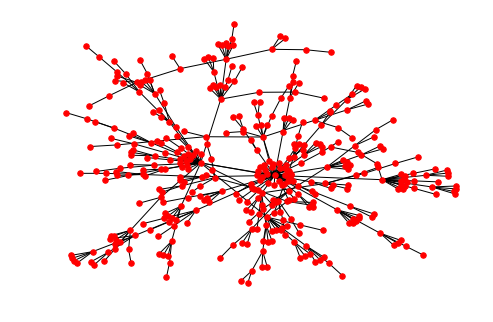

In [6]:
G = nx.random_graphs.powerlaw_cluster_graph(400, 1, .45,100)
# Dibujamos el grafo inicial que se obtiene:
nx.draw_spring(G, node_size=30)
plt.show()

El grafo superior supone un grafo aleatorio basado en el algoritmo de Holme and Kim con 400 nodos, 1 eje por cada nuevo nodo y un 45% de probabilidad de crear un segundo eje por cada nuevo nodo.

A continuación llevaremos a cabo un análisis de comunidades. Para ello necesitaremos definir 'part' y 'mod'. 

Para ello emplearemos la función 'best_partition' que se incluye en la librería 'communities' previamente descaragada.
La función best_partition computa la partición de los nodos del grafo donde que maximiza la modularidad utilizando la heurística Louviana.
Existen multiples algoritmos creados para realizar análisis de comunidades de grafos, pero en este ejemplo emplearemos este.

In [7]:
part = community.best_partition(G)

Finalmente pintamos de nuevo el grafo incluyendo los parámentros calculados en el análisis de comunidades.

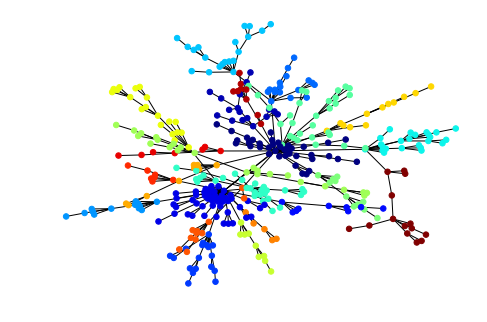

In [8]:
# Color de los nodos utilizando la estructura de la comunidad
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

Comprobamos como el algoritmo de análisis de comunidades ha obtenido varias comunidades distintas que en su representación gráfica parecen tener sentido al estar bastnte bien identificadas, es decir, son heterogéneas entre ellas.

Otra característica de los grafos es la centralidad que básicamente determina la importancia relativa de un nodo dentro del grafo.

Al igual que en el análisis de comunidades, en el análisis de centralidad existen varios algoritmos que permiten calcular en base a distintas operaciones la centralidad de los nodos. En el siguiente ejemplo emplearemos la 'betweenness centrality', cuyo cálculo de la centralidad se basa en el camino más corto entre nodos.

Definimos centralidad1 empleando la función betweeness_centrality de la librería networkx:

In [9]:
centralidad1 = nx.betweenness_centrality(G)

La centralidad puede ser representada con colores, pero como ya estamos representando comunidades con colores, representaremos la centralidad a través del tamaño de los nodos. 
Para ello añadiremos el parametro node_size. 

El valor que devuelve la función de centralidad, es un número comprendido entre 0 y 1. Si añadieramos este valor al node_size diréctamente, los nodos no serían apreciables a la vista, por lo que añadimos la siguiente función para evitar que esto suceda: [v * 1000 for v in centralidad1.values()]

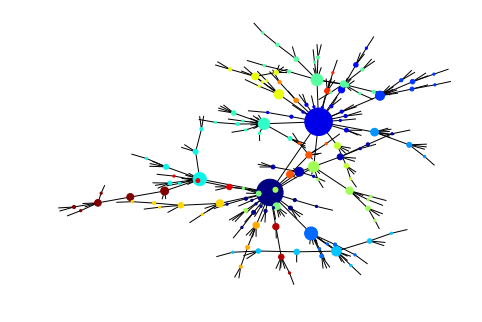

In [10]:
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size= [v * 1000 for v in centralidad1.values()], with_labels=False)
plt.show()

Finalmente, concluiremos este apartado repitiendo el proceso de creación de grafos llevado a cabo, pero esta vez cabiaremos el algoritmo de generación de grafos aleatorios por el de Erdos Reny:

In [11]:
G = nx.random_graphs.erdos_renyi_graph(80,0.075, seed=100)
# n = número de nodos, p= porcentaje de conexiones

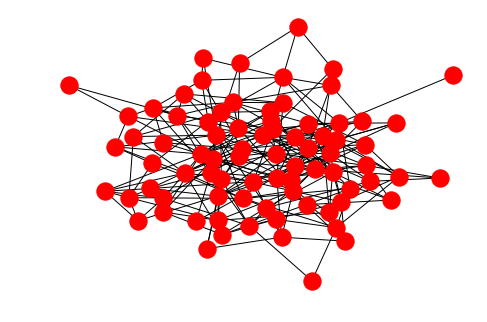

In [12]:
nx.draw_spring(G, with_labels=False)
plt.show()

Vemos como con este nuevo algoritmo es visible que la forma del grafo es distinta a la del anterior algoritmo.

A continuación realizamos el análisis de comunidades:

In [13]:
part = community.best_partition(G)

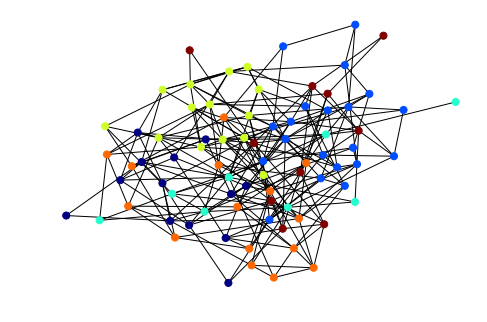

In [14]:
# Color de los nodos utilizando la estructura de la comunidad
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=50, with_labels=False)
plt.show()

Y por último llevamos a cabo el análisis de centralidad:

In [15]:
centralidad2 = nx.betweenness_centrality(G)

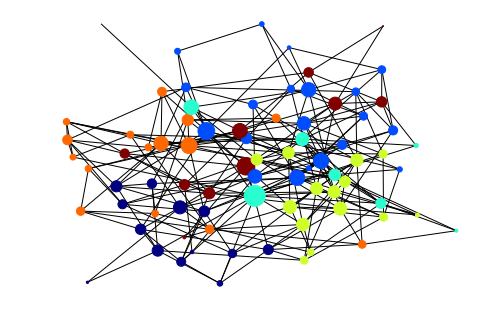

In [16]:
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size= [v * 5000 for v in centralidad2.values()], with_labels=False)
plt.show()

## Segunda Parte: Star Wars, Episodio 4

Hemos seleccionado un dataset en formato json; el dataset contiene información sobre los personajes de las películas de Star Wars relacionando como interactúan durante la película.

El dataset se puede descargar en el siguiente enlace: https://github.com/evelinag/StarWars-social-network

Cada nodo será un personaje y las aristas mostrarán que personajes se han relacionado entre sí. 

Intentaremos que el tamaño del nodo vaya en función del número de interacciones que tiene el personaje con el resto de personajes mostrando cual es el que más interacciones tiene y por tanto el más importante de la película.

In [17]:
data = json.load(open('Episode4StarWars.json'))

pprint(data)

{'links': [{'source': 1, 'target': 0, 'value': 3},
           {'source': 2, 'target': 0, 'value': 17},
           {'source': 8, 'target': 0, 'value': 1},
           {'source': 3, 'target': 0, 'value': 14},
           {'source': 9, 'target': 0, 'value': 1},
           {'source': 10, 'target': 0, 'value': 4},
           {'source': 7, 'target': 0, 'value': 5},
           {'source': 6, 'target': 0, 'value': 1},
           {'source': 13, 'target': 0, 'value': 6},
           {'source': 1, 'target': 10, 'value': 4},
           {'source': 2, 'target': 1, 'value': 4},
           {'source': 1, 'target': 3, 'value': 14},
           {'source': 1, 'target': 13, 'value': 19},
           {'source': 1, 'target': 7, 'value': 8},
           {'source': 5, 'target': 3, 'value': 2},
           {'source': 6, 'target': 5, 'value': 2},
           {'source': 6, 'target': 3, 'value': 4},
           {'source': 4, 'target': 7, 'value': 1},
           {'source': 8, 'target': 3, 'value': 3},
           {'source': 8

El source representa el nodo origen y el target el nodo destino; el value de "links" es el número de veces que se repite esa conexión, es decir, el número de veces que interatúan durante la pelíucula ambos personajes.

El Id del personaje lo da el orden que tiene, por lo tanto Luke sería el "0", R2-D" el "1" y así sucesivamente; el value de nodes representa el número de veces que aparece el personaje.

En primer lugar, emplearemos la función 'nx.json_graph.node_link_graph' que nos permite crear un grafo a partir de un json debidamente formateado. En nuestro caso el dataset tiene un formato correcto, por lo que ejecutaremos la función directamente sobre el json importado.

In [18]:
H = nx.json_graph.node_link_graph(data)

Una vez ejecutada la función anterior, ejecutamos el análisis de comunidades igual que lo hemos hecho en los apartados anteriores, guardando el resultado en 'part' que lo usaremos más adelante.

In [19]:
part = community.best_partition(H)
values = [part.get(node) for node in H.nodes()]

El siguiente paso que necesitamos es añadir los nombres de los personajes a cada nodo. Esto se conoce como label. Para ello extraemos del json original la lista de nodos y lo convertimos en dataframe.

In [20]:
nodes = data["nodes"]
nodesdf = pd.DataFrame(nodes)

A continuación seleccionamos la columna name del dataframe creado, almacenándola en labels.

In [21]:
labels = nodesdf['name']

Una vez hechos los ficheros anteriores, necesitaremos definir 'pos' a través de la función spring_layout. Con esto lo que estamos haciendo es definir la posición de los nodos en el grafo en base al algoritmo Fruchterman-Reingold.

In [22]:
pos=nx.spring_layout(H)

Finalmente representamos todo el trabajo llevado a cabo en un grafo.
 - En la primera línea le indicamos que los labels se corresponden al objeto creado antes, llamado también labels, y le indicamos ue la posición es pos, también definida anteriormente. También le indicamos el tamaños del texto.
 - En la segunda línea estamos dibujando el grafo, indicándole el tamaño, la posición, y el color, el cual le decimos que es el que hemos definido anteriormente al hacer el análisis de comunidades.
 - En la tercera línea (opcional) le indicamos el tamaño del grafo para poder verlo con claridad, ya que sino queda muy pequeño.
 - En la última línea lo representamos.

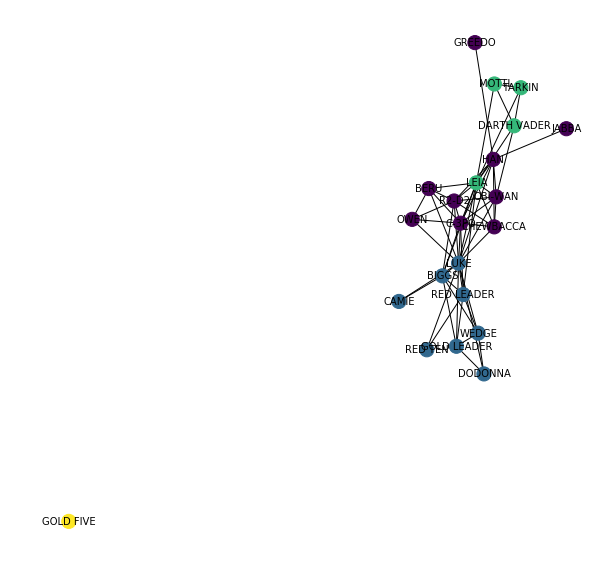

In [41]:
nx.draw_networkx_labels(H,pos,labels=labels,font_size=10)
nx.draw(H,node_size=200, node_color= values, pos=pos)
plt.rcParams["figure.figsize"] = [20,20]
plt.show()

Para concluir el trabajo vamos implementar una función muy útil en la teoría de grafos. Con ella lo que queremos es saber cual es el 'camino' más corto para llegar a un nodo desde otro. O dicho de otra manera, cual será la conexión más cercana entre dos personajes de la película.

Definimos por tanto p

In [43]:
p=nx.shortest_path(H) 

p tiene la siguiente estructura: p[source][target]
En este ejemplo vamos a ver cual será el camino más corto entre R2D2, id = 0 y Darth Vader, id = 4.

In [44]:
p[0][4]

[0, 10, 4]

El resultado nos muestra que para completar ese camino lo único que tenemos que hacer es pasar por el nodo 10, correspondiente a Obi Wan.

# Conclusión:
Los Grafos son muy útiles para llevar a cabo análisis de redes. Especialmente interesante son los usos de estos en análisis de redes sociales ya que nos permiten ver facilmente aspectos que inicialmente no son tan obvios, como relaciones existentes entre nodos, cercanía de las relaciones, comunidades de nodos, etc. 

En el presente trabajo se han tratado los grafos en dos partes. 

En la primera hemos podido implementar algoritmos de creación de grafos aleatorios, así como ejecutar dentro de ellos análisis de centralidad y de comunidades. 

En la segunda parte y con el objetivo de llevar lo aprendido en la primera parte a un campo más práctico, hemos obtenido analizado las interacciones existentes en Star Wars: Episode 4. Finalmente hemos llevado a cabo un análisis de comunidades dentro de dicho grafo, en el que se ha obtenido que existen 4 comunidades distintas, siendo una de ellas de un sólo nodo, Gold Five, que aparece en la película pero no interactua. Una de las utilidades de los grafos es la capacidad de mostrar facilmente la ruta más corta entre individuos, funcionalidad que hemos comprobado a través de la búsqueda de la conexión más corta entre R2D2 y Darth Vader.